In [64]:
# Import dependencies
from config import weather_api_key
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import time

In [48]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [49]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [50]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [51]:
# Display the latitude and longitude combinations
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    print(city, country)

nikolskoye ru
cape town za
prince rupert ca
barrow us
kaitangata nz
port alfred za
ancud cl
castro cl
hilo us
upernavik gl
sao joao da barra br
benin ng
hermanus za
barentu er
hobart au
airai pw
batouri cm
lokosovo ru
torbay ca
kapaa us
atuona pf
arlit ne
avarua ck
jamestown sh
taolanaro mg
kameshkovo ru
cidreira br
punta arenas cl
norman wells ca
mabaruma gy
a no
tsihombe mg
saint george bm
bodden town ky
alyangula au
nouadhibou mr
salalah om
jamestown sh
bubaque gw
tuktoyaktuk ca
punta arenas cl
cabo san lucas mx
rikitea pf
charters towers au
vaini to
chokurdakh ru
qaqortoq gl
constitucion mx
lavrentiya ru
esfahan ir
bethel us
luderitz na
kodiak us
pisco pe
airai pw
pacific grove us
port alfred za
bredasdorp za
ostrovnoy ru
busselton au
busselton au
ancud cl
cape town za
atuona pf
erenhot cn
turukhansk ru
kashan ir
belushya guba ru
nome us
upernavik gl
iranshahr ir
hermanus za
port elizabeth za
yellowknife ca
rikitea pf
ndele cf
hermanus za
ketchikan us
butaritari ki
cherskiy ru
sask

bagula in
port alfred za
tasiilaq gl
souillac mu
provideniya ru
prince rupert ca
alice springs au
rikitea pf
rikitea pf
ijaki ki
itarema br
hermanus za
bredasdorp za
taolanaro mg
rikitea pf
busselton au
mataura pf
busselton au
nuuk gl
lebu cl
ushuaia ar
barentsburg sj
lahaina us
illoqqortoormiut gl
castro cl
tasiilaq gl
hailey us
maceio br
davila ph
ancud cl
muros es
kapaa us
airai pw
bluff nz
roebourne au
nouadhibou mr
chuy uy
tonantins br
arraial do cabo br
cidreira br
conchas br
jamestown sh
busselton au
nola cf
ushuaia ar
berlevag no
kyabram au
clyde river ca
moengo sr
rikitea pf
saint-leu re
hobart au
mataura pf
taolanaro mg
krasnoselkup ru
mataura pf
yeppoon au
otjimbingwe na
ushuaia ar
nguiu au
attawapiskat ca
mataura pf
vaini to
illoqqortoormiut gl
bambous virieux mu
taolanaro mg
atuona pf
poli cm
lagoa pt
mataura pf
castro cl
east london za
husavik is
chuy uy
hilo us
upernavik gl
bluff nz
barrow us
new norfolk au
bambous virieux mu
payo ph
georgetown sh
busselton au
fortuna us

ushuaia ar
sao filipe cv
chokurdakh ru
longyearbyen sj
cape town za
airai pw
tyukhtet ru
nizhneyansk ru
barrow us
barentsburg sj
ouesso cg
baykit ru
port alfred za
rikitea pf
atuona pf
nishihara jp
hilo us
magalia us
illoqqortoormiut gl
hermanus za
yellowknife ca
muros es
eldikan ru
ushuaia ar
hervey bay au
thompson ca
mar del plata ar
preobrazheniye ru
khash ir
port-gentil ga
barentsburg sj
busselton au
mount isa au
geraldton au
cape town za
port alfred za
rikitea pf
bredasdorp za
kysyl-syr ru
punta arenas cl
bredasdorp za
kabalo cd
kaniama cd
new norfolk au
resistencia ar
yurgamysh ru
jasper ca
bluff nz
muroto jp
castro cl
illoqqortoormiut gl
erzin ru
jamestown sh
nuuk gl
hithadhoo mv
tiksi ru
clyde river ca
norman wells ca
temaraia ki
esperance au
mataura pf
busselton au
kruisfontein za
severo-kurilsk ru
ushuaia ar
viligili mv
jamestown sh
samalaeulu ws
san rafael ar
hithadhoo mv
bredasdorp za
miguel alves br
kapaa us
rawson ar
pemangkat id
crotone it
lorengau pg
vaini to
fethiye tr

In [52]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name

    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [53]:
# Create a URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key + '&q='
url

'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b0a06142b8c6c728f38f5539f9d75362&q='

In [54]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval')
print('-----------------------------')

# Initalize counters
record_count = 1
set_count = 1

# Loop through all the cities
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0) and (i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL for each city
    city_url = url + city.replace(' ', '+')
    
    # Log the URL, record, set numbers, and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Increment the record count
    record_count += 1

    # Run an  API request for each city
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Add the city information to city_data
        city_data.append({
            'City': city.title(),
            'Lat': city_lat,
            'Lng': city_lng,
            'Max Temp': city_max_temp,
            'Humidity': city_humidity,
            'Cloudiness': city_clouds,
            'Wind Speed': city_wind,
            'Country': city_country,
            'Date': city_date
        })
    # If an error is experienced, skip the city
    except: 
        print('City not found. Skipping...')
        pass
    
# Indicate that the data loading is complete
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | prince rupert
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | benin
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | barentu
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | batouri
Processing Record 18 of Set 1 | lokosovo
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | arlit
Processing Record 23 of Set 1 | avarua
Processing Record 24 

Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | kokopo
Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | peetri
Processing Record 42 of Set 4 | marsabit
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | camacupa
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | manacapuru
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | kenai
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 5 | porto novo
Processing Record 4 of Set 5 | morehead
Processing Record 5 of Set 5 | coihaique
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | wahiawa
Processing Record 9 of Set 5 | ilulissat
Processing

Processing Record 27 of Set 8 | san felipe
Processing Record 28 of Set 8 | lahat
Processing Record 29 of Set 8 | palmerston north
Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | gladstone
Processing Record 33 of Set 8 | san policarpo
Processing Record 34 of Set 8 | garowe
Processing Record 35 of Set 8 | gunjur
Processing Record 36 of Set 8 | marsaxlokk
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 40 of Set 8 | aripuana
Processing Record 41 of Set 8 | olovyannaya
Processing Record 42 of Set 8 | orbetello
Processing Record 43 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 44 of Set 8 | boguchany
Processing Record 45 of Set 8 | kawai
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | jingdezhen
Processing Record 48 of Set 8 | batagay-alyta
Processing

City not found. Skipping...
Processing Record 16 of Set 12 | san rafael
Processing Record 17 of Set 12 | miguel alves
Processing Record 18 of Set 12 | pemangkat
Processing Record 19 of Set 12 | crotone
Processing Record 20 of Set 12 | fethiye
Processing Record 21 of Set 12 | vila franca do campo
Processing Record 22 of Set 12 | sungaipenuh
Processing Record 23 of Set 12 | ryotsu
Processing Record 24 of Set 12 | bunol
Processing Record 25 of Set 12 | revelstoke
Processing Record 26 of Set 12 | iqaluit
Processing Record 27 of Set 12 | phatthalung
-----------------------------
Data Retrieval Complete
-----------------------------


In [55]:
len(city_data)

529

In [56]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Reorder the columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-08-19 01:14:34,59.70,30.79,51.01,81,0,4.47
1,Cape Town,ZA,2020-08-19 01:14:35,-33.93,18.42,50.00,81,75,2.24
2,Prince Rupert,CA,2020-08-19 01:10:03,54.32,-130.32,64.40,68,75,11.41
3,Barrow,US,2020-08-19 01:10:34,71.29,-156.79,57.20,71,1,4.70
4,Kaitangata,NZ,2020-08-19 01:09:43,-46.28,169.85,48.72,90,100,2.04


In [57]:
# Create the output CSV file
output_file = 'weather_data/cities.csv'

# Export city_data into the file
city_data_df.to_csv(output_file, index_label='City_ID')

In [58]:
# Extract relevant fields from city_data_df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

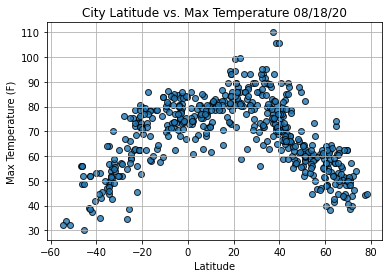

In [59]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig1.png')

plt.show()

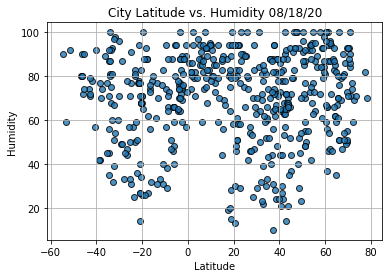

In [60]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Humidity ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')

plt.show()

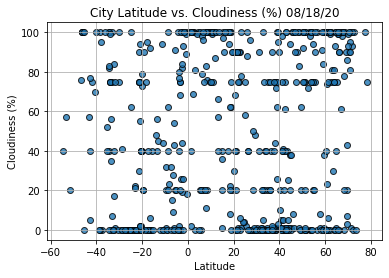

In [61]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')

plt.show()

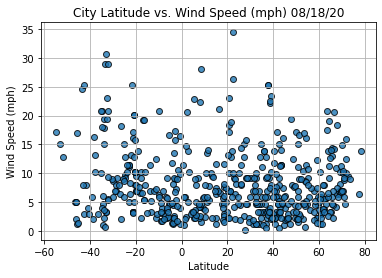

In [62]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Wind Speed (mph) ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')

plt.show()